# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [8]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/prestonkirschner/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")
print(api_key)

377af0234a1747358283764108b4cceb


In [10]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [43]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy',
                                      )
btc_articles['status']

'ok'

In [47]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy',
                                      )
eth_articles['status']

'ok'

In [48]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []
for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_sentiment_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sentiment_df = btc_sentiment_df[cols]

btc_sentiment_df.head()



,date,text,compound,positive,negative,neutral
0,2022-02-11,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831
1,2022-02-17,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853
2,2022-02-13,The couple would never flee from the country a...,-0.3400,0.057,0.118,0.825
3,2022-02-14,"If Sundays Super Bowl ads are any indication, ...",0.7783,0.163,0.000,0.837
4,2022-02-12,The news of one of the biggest money launderin...,0.5859,0.124,0.000,0.876


In [49]:
# Create the Ethereum sentiment scores DataFrame
# Create the Bitcoin sentiment scores DataFrame
ethereum_sentiments = []
for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_sentiment_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sentiment_df = eth_sentiment_df[cols]

eth_sentiment_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848
1,2022-02-17,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941
2,2022-02-16,People in Colorado will be able to pay their s...,-0.1027,0.000,0.036,0.964
3,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812
4,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917


In [51]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.027100,0.070050,0.063550,0.866450
std,0.526234,0.056289,0.075289,0.066594
min,-0.771300,0.000000,0.000000,0.739000
25%,-0.323650,0.028500,0.000000,0.829500
50%,0.038600,0.061500,0.023000,0.853500
75%,0.564525,0.117250,0.118500,0.905500
max,0.778300,0.163000,0.211000,1.000000


In [50]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.138635,0.074300,0.033850,0.891850
std,0.391072,0.080074,0.042274,0.090052
min,-0.526700,0.000000,0.000000,0.692000
25%,-0.110175,0.000000,0.000000,0.841000
50%,0.000000,0.057500,0.000000,0.904500
75%,0.502100,0.130250,0.065000,0.958000
max,0.772200,0.249000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum, significantly higher

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [60]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [109]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'u','ha','char','chars','wa'}

In [110]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [111]:
# Create a new tokens column for Bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['text'].apply(tokenizer)
btc_sentiment_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-02-11,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831,"[netflix, making, docuseries, one, worst, rapp..."
1,2022-02-17,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853,"[even, cyberspace, department, justice, able, ..."
2,2022-02-13,The couple would never flee from the country a...,-0.3400,0.057,0.118,0.825,"[couple, would, never, flee, country, risk, lo..."
3,2022-02-14,"If Sundays Super Bowl ads are any indication, ...",0.7783,0.163,0.000,0.837,"[sundays, super, bowl, ad, indication, crypto,..."
4,2022-02-12,The news of one of the biggest money launderin...,0.5859,0.124,0.000,0.876,"[news, one, biggest, money, laundering, scheme..."


In [112]:
# Create a new tokens column for Ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['text'].apply(tokenizer)
eth_sentiment_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848,"[february, shit, hit, fan, usual, way, old, tw..."
1,2022-02-17,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941,"[technical, analysis, isnt, perfect, tool, may..."
2,2022-02-16,People in Colorado will be able to pay their s...,-0.1027,0.000,0.036,0.964,"[people, colorado, able, pay, state, tax, cryp..."
3,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812,"[coinbase, reported, share, trading, volume, e..."
4,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917,"[illustration, james, bareham, verge, 15, mill..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [113]:
from collections import Counter
from nltk import ngrams

In [114]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ' '.join(btc_sentiment_df.text)
bitcoin_processed = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(10)))

{('new', 'york'): 2, ('reuters', 'bitcoin'): 2, ('netflix', 'making'): 1, ('making', 'docuseries'): 1, ('docuseries', 'one'): 1, ('one', 'worst'): 1, ('worst', 'rapper'): 1, ('rapper', 'time'): 1, ('time', 'coincidentally'): 1, ('coincidentally', 'heather'): 1}


In [115]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ' '.join(eth_sentiment_df.text)
ethereum_processed = tokenizer(ethereum_text)
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereum_ngrams.most_common(10)))

{('trading', 'volume'): 2, ('15', 'million'): 2, ('since', 'russia'): 2, ('russia', 'attacked'): 2, ('cryptocurrency', 'boom'): 2, ('boom', 'past'): 2, ('past', 'year'): 2, ('year', 'helped'): 2, ('helped', 'propel'): 2, ('propel', 'newer'): 2}


In [116]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [121]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top10 = token_count(bitcoin_processed)
bitcoin_top10

[('bitcoin', 12),
 ('reuters', 6),
 ('feb', 5),
 ('crypto', 4),
 ('russia', 4),
 ('market', 4),
 ('money', 3),
 ('would', 3),
 ('country', 3),
 ('one', 2)]

In [118]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top10 = token_count(ethereum_processed)
ethereum_top10

[('past', 6),
 ('crypto', 5),
 ('ethereum', 4),
 ('may', 4),
 ('cryptocurrency', 4),
 ('year', 4),
 ('volume', 4),
 ('newsletter', 4),
 ('hit', 3),
 ('share', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [93]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=159555 sha256=a2bdb7ddd9add13039ff737f30f411b8650376dae73ce489ceb059247339cdcd
  Stored in directory: /Users/prestonkirschner/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud


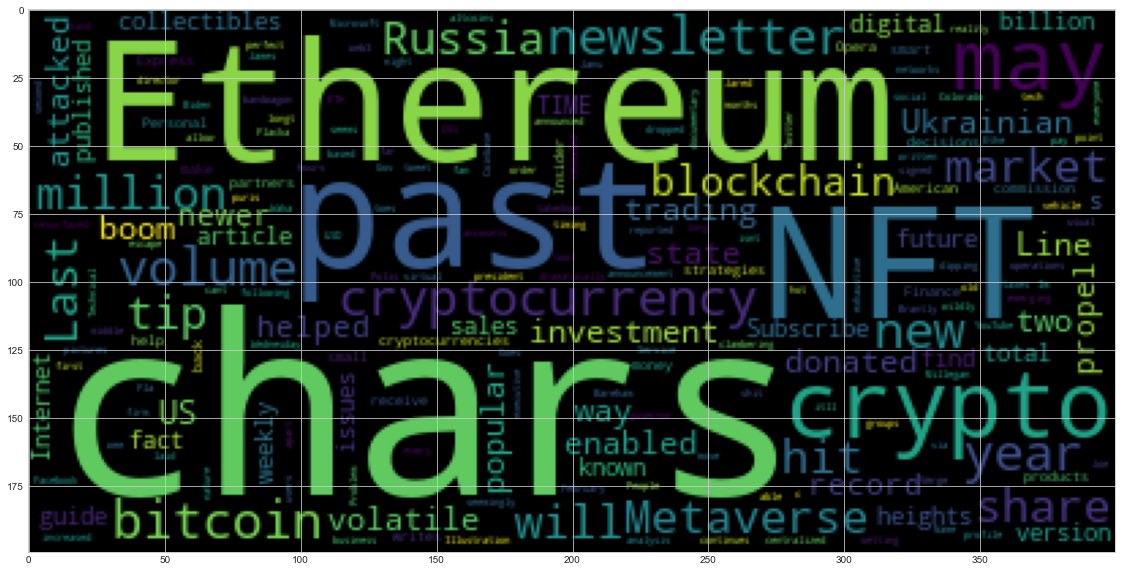

In [124]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

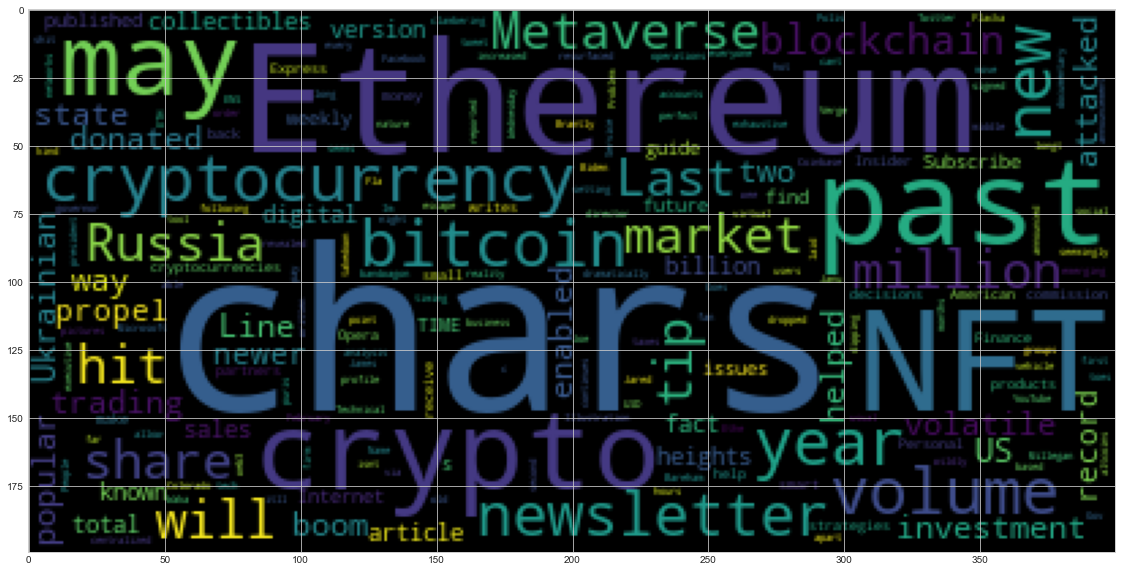

In [98]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [125]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [127]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [131]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ' '.join(btc_sentiment_df.text)
bitcoin_text

'Netflix\r\n is making a docuseries about one of the worst rappers of all time\r\n. Coincidentally, Heather "Razzlekhan" Morgan and her husband, Ilya Lichtenstein, were charged this week with conspiring t… [+1432 chars] Even in cyberspace, the Department of Justice is able to use a tried and true investigative technique, following the money, Ms. Monaco said. Its what led us to Al Capone in the 30s. It helped us dest… [+1176 chars] The couple would never flee from the country at the risk of losing access to their ability to have children, the lawyer wrote.\r\nAt the hearing, a prosecutor, Margaret Lynaugh, said in opposing bail f… [+1600 chars] If Sundays Super Bowl ads are any indication, crypto has truly arrived in mainstream culture. And if you didnt catch the game, you can watch the ads here, featuring Larry David, LeBron James, and a Q… [+3454 chars] The news of one of the biggest money laundering schemes in history captivated the world on Tuesday, not so much because of the crimew

In [132]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [133]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [134]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text + ' ' + ent.label_)

Netflix ORG
about one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
the Department of Justice ORG
Monaco PERSON
Al Capone LOC
Margaret Lynaugh PERSON
Sundays Super Bowl EVENT
Larry David PERSON
LeBron James PERSON
+3454 ORG
one CARDINAL
Tuesday DATE
$4.5 billion MONEY
Lichtensteins PERSON
Feb. 1 DATE
roughly $3.6 billion MONEY
the New York Times ORG
Feb 22 DATE
Reuters ORG
2021 DATE
thousands CARDINAL
March 1 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Satoshi Nakamoto PERSON
2008 DATE
Getty
Welcome to ORG
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
YouTube ORG
Alex Castro PERSON
Verge ORG
BitConnect ORG
Nurphoto/Getty ORG
Russia GPE
last Thursday DATE
Ukranian NORP
Mexico City GPE
Telegr ORG
Feb 15 DATE
Reuters ORG
Europe LOC
two CARDINAL
Russia GPE
LONDON GPE
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
NEW YORK GPE
Feb 11 DATE
Reuters ORG
Federal Reserve ORG
Reuters ORG
BITCOIN PERSON
Ukrainian NORP
Tom Lee PERSON
Ukrain

---

### Ethereum NER

In [135]:
# Concatenate all of the Ethereum text together
ethereum_text = ' '.join(eth_sentiment_df.text)
ethereum_text

'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars] Technical analysis isnt a perfect tool, but it may point the way for Ethereum\r\nEthereum\xa0(ETH-USD\r\n) continues to be a volatile crypto investment. Crypto is volatile by nature Im not setting it apart … [+3612 chars] People in Colorado will be able to pay their state taxes in cryptocurrency by the middle of this year, the US state\'s governor has revealed.\r\nGov. Jared Polis laid out the timing of the move, a longt… [+2206 chars] Coinbase reported that the share of trading volume for ethereum and other altcoins increased last year, while bitcoin\'s share dropped dramatically.\xa0\r\nBetween 2020 and 2021, ethereum trading volume in… [+1187 chars] Illustration by James Bareham / The Verge\r\n\n \n\n\n More than $15 million has been donated so far More than $15 million 

In [136]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [138]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [140]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text + ' ' + ent.label_)

February DATE
Ethereum Name Service ORG
ENS ORG
May 201 DATE
Ethereum ORG
ETH-USD ORG
Crypto PERSON
Colorado GPE
the middle of this year DATE
US GPE
Jared Polis PERSON
Coinbase PERSON
last year DATE
Between 2020 and 2021 DATE
James Bareham PERSON
More than $15 million MONEY
More than $15 million MONEY
Ukrainian GPE
Russia GPE
2022 DATE
Facebook ORG
Microsoft ORG
Last night TIME
Twitter PRODUCT
Ethereum ORG
second ORDINAL
two months DATE
NFT ORG
over two hours TIME
YouTube ORG
Waka Flacka Fla ORG
the past few years DATE
NFT ORG
$23 billion MONEY
TIME ORG
weekly DATE
TIME ORG
weekly DATE
Joe Biden PERSON
Wednesday DATE
first ORDINAL
Bitcoin PERSON
Brett Harrison PERSON
Bitcoin PERSON
the past few years DATE
NFT ORG
$23 billion MONEY
Ethereum ORG
American Express ORG
Russia GPE
Ukraine GPE
Opera ORG
Keshas PERSON
Opera ORG
Monday DATE
American Express ORG
more than $4 million MONEY
Russia GPE
Elliptic LOC


---